# Notebook for generating shutterfiles
## Setting inputs: length of flight path, t offset and repetition frequency
## Inputs for the shutter file generation: number of windows, and, for each window, tof/wavelength start-end and bin size 

In [149]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import csv
import sys
#%matplotlib notebook
%matplotlib inline

In [150]:
L=19 #in meters
t0=0 #in ms
f=22 #in Hz
t2overlap=1000/f #in ms

In [151]:
# function to convert tof to lambda
def tof2l(tof):
    l=3.956*(tof-t0)/L
    return l

In [152]:
# function to convert lambda to tof
def l2tof(l):
    tof=t0+l*L/3.956
    return tof

In [153]:
# number of acquisition windows
n_windows=input("Enter the number of acquisition window: ")
n_windows=5; # REMOVE THIS AFTER DEBUG
windows=np.zeros((n_windows,2))

Enter the number of acquisition window: 5


In [154]:
# REMOVE THE WHOLE SECTION AFTER DEBUG
windows[0][0]=7
windows[0][1]=8.78

windows[1][0]=9.12
windows[1][1]=12.2

windows[2][0]=12.54
windows[2][1]=15.6

windows[3][0]=15.94
windows[3][1]=22

windows[4][0]=22.34
windows[4][1]=36

In [155]:
# for i in range (0,n_windows):
#     while True:
#         if (i==0):
#             windows[i][0]=input("Enter the ToF start for window %i (in ms):" %(i+1))
#             windows[i][1]=input("Enter the ToF end for window %i (in ms):" %(i+1))
#             if ((windows[i][0]>0)and(windows[i][1]>windows[i][0])):
#                 break
#             print("ERROR!")
#         else:   
#             windows[i][0]=input("Enter the ToF start for window %i (in ms):" %(i+1))
#             windows[i][1]=input("Enter the ToF end for window %i (in ms):" %(i+1))
#             if ((windows[i][0]>0)and(windows[i][1]>windows[i][0]))and(windows[i][0]>windows[i-1][1]):
#                 break
#             print("ERROR!")
            

In [156]:
# Windows durations
delta_tof=windows[:,1]-windows[:,0]
print(delta_tof)

[ 1.78  3.08  3.06  6.06 13.66]


In [157]:
clock_frequency=np.zeros((14))
clock_divider=np.zeros((n_windows))
clock_time=np.zeros((14))
for i in range (0,14):
    clock_frequency[i]=100/(2**i)
    clock_time[i]=0.00001*(2**i)
    #clock_divider[i]=i
range_covered=11800*clock_time
print(clock_frequency)
print(clock_time)
#print(clock_divider)
print(range_covered)


[1.00000000e+02 5.00000000e+01 2.50000000e+01 1.25000000e+01
 6.25000000e+00 3.12500000e+00 1.56250000e+00 7.81250000e-01
 3.90625000e-01 1.95312500e-01 9.76562500e-02 4.88281250e-02
 2.44140625e-02 1.22070312e-02]
[1.000e-05 2.000e-05 4.000e-05 8.000e-05 1.600e-04 3.200e-04 6.400e-04
 1.280e-03 2.560e-03 5.120e-03 1.024e-02 2.048e-02 4.096e-02 8.192e-02]
[1.18000e-01 2.36000e-01 4.72000e-01 9.44000e-01 1.88800e+00 3.77600e+00
 7.55200e+00 1.51040e+01 3.02080e+01 6.04160e+01 1.20832e+02 2.41664e+02
 4.83328e+02 9.66656e+02]


In [158]:
for i in range (0,n_windows):
    for j in range (0,14):
            if delta_tof[i]<range_covered[j]:
                clock_divider[i]=j
                break
print(clock_divider)
    

[4. 5. 5. 6. 7.]


In [159]:
clock_time[int(clock_divider[2])]

0.00032

In [161]:
# Bin width. THIS IS AN INPUT
bin_width=np.zeros((n_windows));
while True:
    for i in range (0,n_windows):
        bin_width[i]=input("Enter the Bin width in acquisition window %i in (us): "%(i+1))
        print((bin_width[i]/(1000*clock_time[int(clock_divider[i])]))
        if 0.001*(bin_width[i]/clock_time[int(clock_divider[i])])).is_integer():
            break
        print("Error!")
        
# bin_width[0]=20.48
# bin_width[1]=5.12
# bin_width[2]=5.12
# bin_width[3]=5.12
# bin_width[4]=40.96


SyntaxError: invalid syntax (<ipython-input-161-97ec64b155af>, line 7)

In [104]:
# Shutter duration
n_shutter=n_windows-1
duration=np.zeros((n_shutter))
for i in range (0,n_shutter):
    duration[i]=windows[i+1][0]-windows[i][1]
print(duration)

[0.34 0.34 0.34 0.34]


In [105]:
# Resolution calculation
min_res=bin_width*0.001/windows[:,0]
max_res=bin_width*0.001/windows[:,1]
print(min_res*100)
print(max_res*100)

[0.29257143 0.05614035 0.04082935 0.03212045 0.18334825]
[0.2332574  0.04196721 0.03282051 0.02327273 0.11377778]


In [106]:
# calculation of the number of file and space needed
no_file=np.ceil(delta_tof*1000/bin_width);
tot_file=np.sum(no_file)
print(tot_file)
print(no_file)

2805.0
[  87.  602.  598. 1184.  334.]


In [107]:
#base_path = "/path/to/directory/holding/file/"
filename = "Fe_standard_J-parc.txt"
#path_to_file = os.path.join(base_path, filename)
#fd = open(path_to_file , 'r')
fp = open(filename , 'r')
#spectrum=csv.reader(fp, delimiter="\t")

In [108]:
data = np.genfromtxt(filename, delimiter = '\t', skip_header=1)

In [109]:
#type(data)
x,y=data.T
#x_axis=x(0)
#y_axis=y(0)
#np.delete(x,0)
#np.delete(y,0)

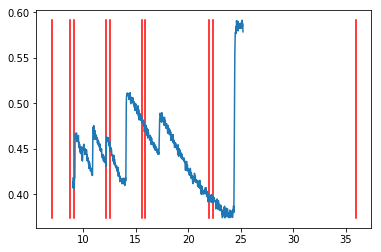

In [110]:

for i in range (0,n_windows):
    win_plot_x_1=(windows[i][0],windows[i][0])
    win_plot_y_1=(min(y),max(y))
    plt.plot(win_plot_x_1,win_plot_y_1,'r-')
    win_plot_x_2=(windows[i][1],windows[i][1])
    win_plot_y_2=(min(y),max(y))
    plt.plot(win_plot_x_2,win_plot_y_2,'r-')
plt.plot(x/1000,y)
   
